# THE SPARKS FOUNDATION TASK 3
## Exploratory Data Analysis on SampleSuperstore Dataset 

*For the given dataset (https://bit.ly/3i4rbWl)*

## By S.Tejeswani 


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [154]:
import warnings
warnings.filterwarnings('ignore')

## loading the data

In [155]:
data = pd.read_csv("C:\\users\\SampleSuperstore.csv")

In [156]:
data.head() #display first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [157]:
data.tail() #display last 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [159]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [160]:
data.shape

(9994, 13)

In [161]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [162]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [163]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [164]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [165]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [166]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [167]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

## preprocessing the data

In [168]:
data.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [169]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## correlation matrix

In [170]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

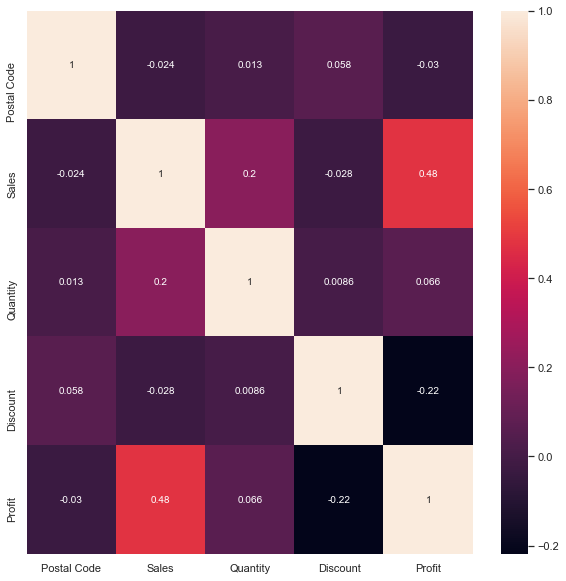

In [171]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

## exploratory data analysis

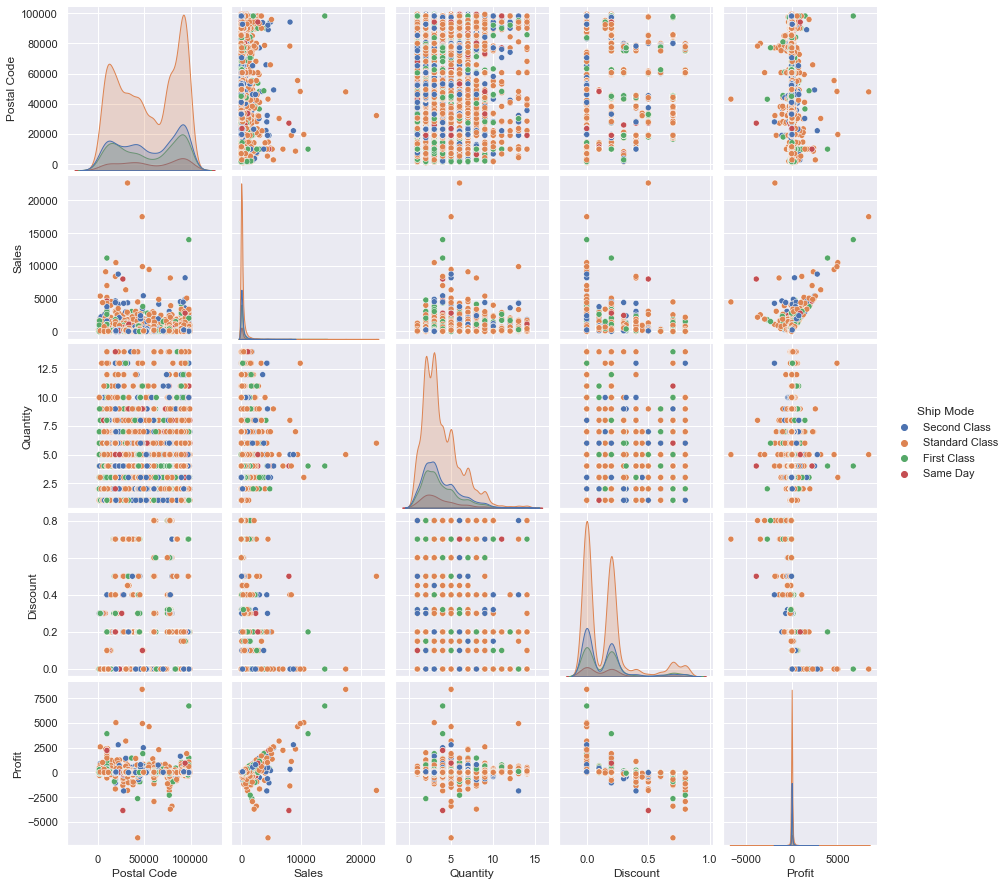

In [114]:
sns.pairplot(data,hue='Ship Mode')

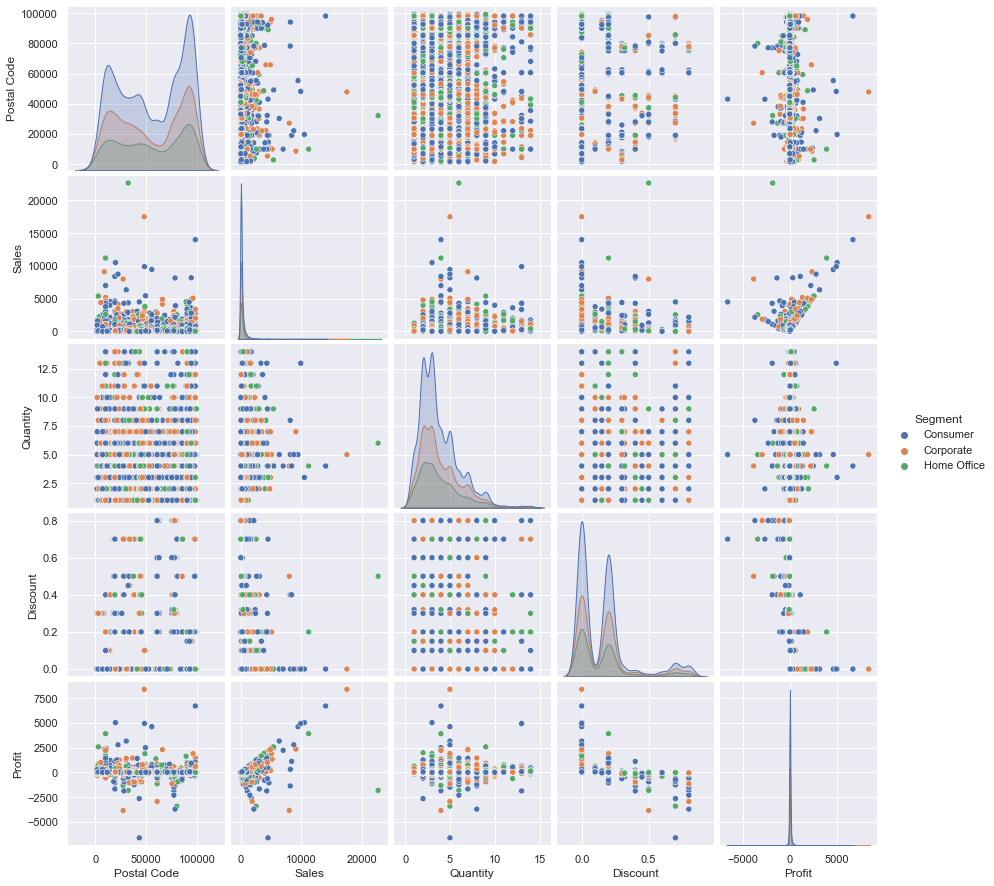

In [73]:
sns.pairplot(data,hue='Segment')

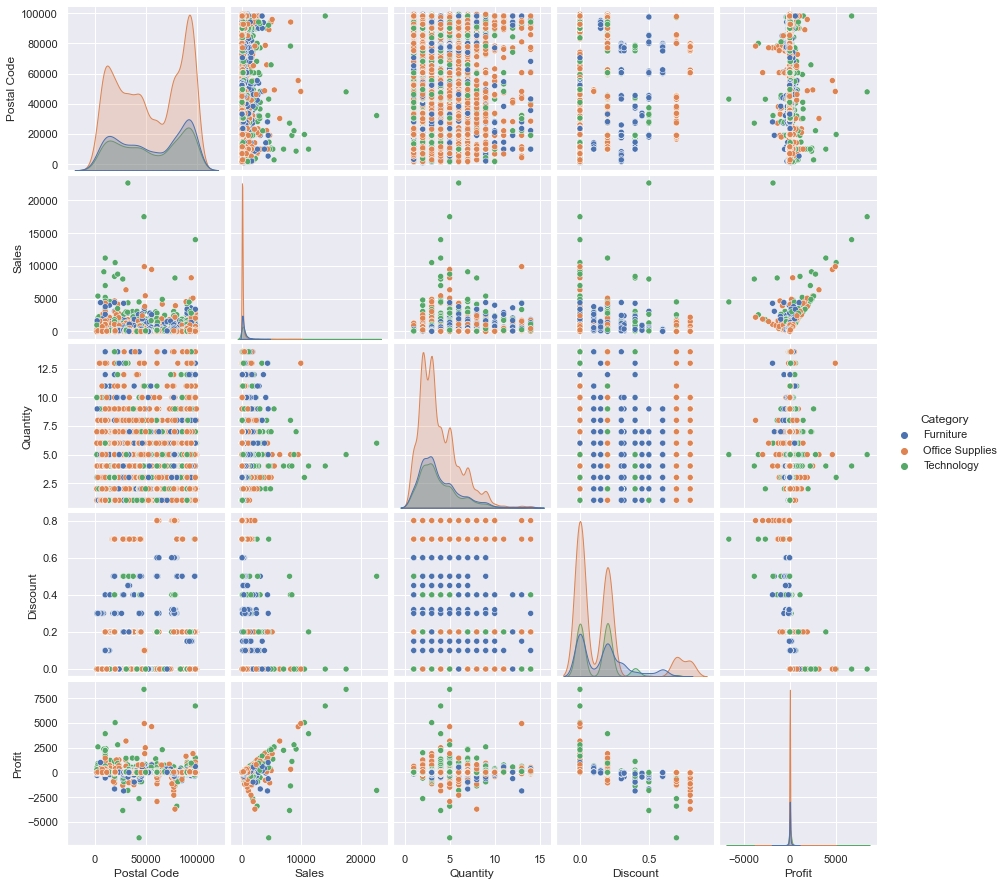

In [72]:
sns.pairplot(data,hue='Category')

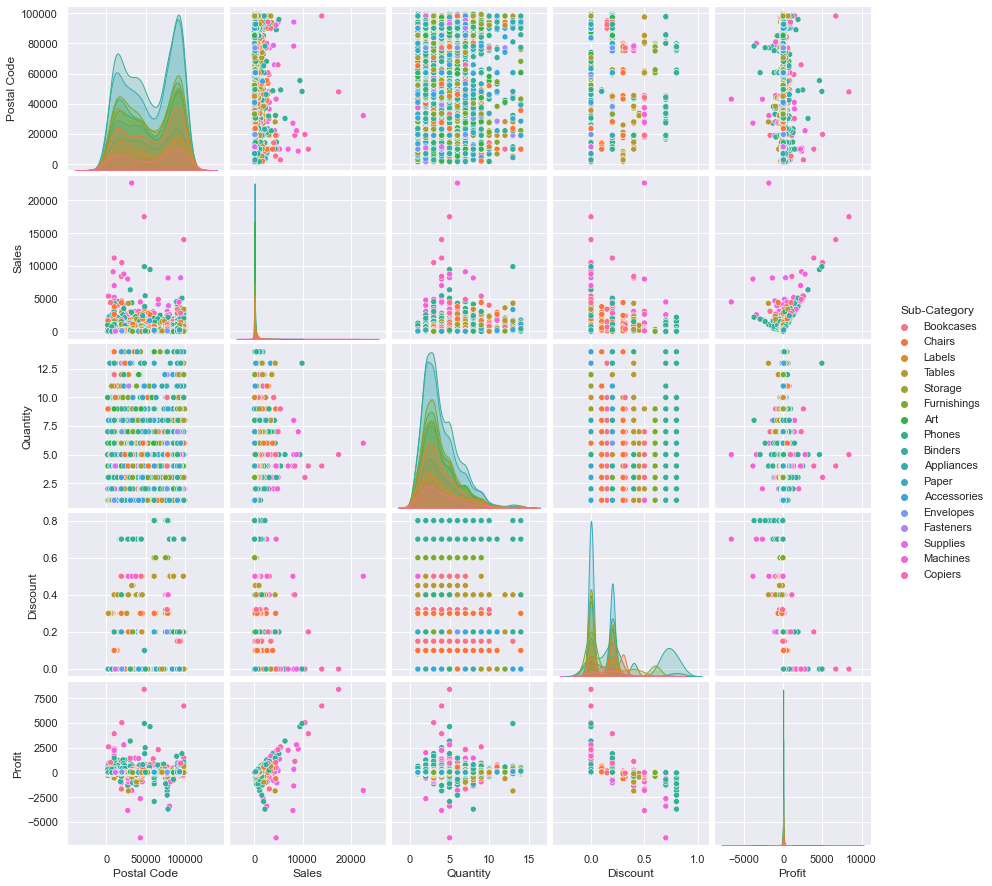

In [74]:
sns.pairplot(data,hue='Sub-Category')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

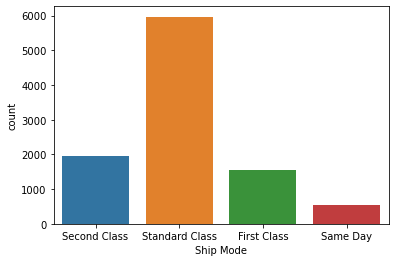

In [26]:
sns.countplot(data['Ship Mode'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

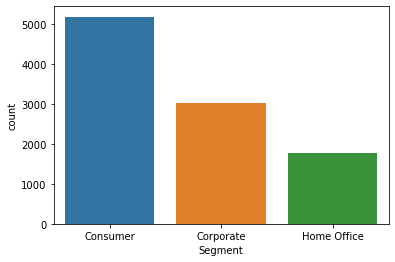

In [27]:
sns.countplot(data['Segment'])

<AxesSubplot:ylabel='Category'>

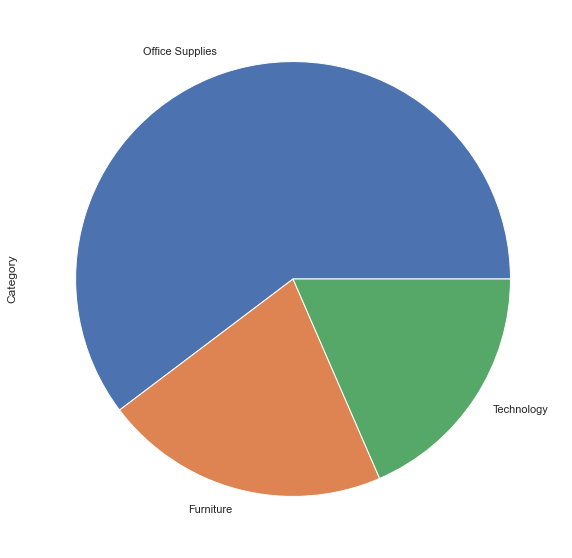

In [172]:
sns.set(rc={'figure.figsize':(10,10)})
data['Category'].value_counts().plot.pie()

<AxesSubplot:ylabel='Sub-Category'>

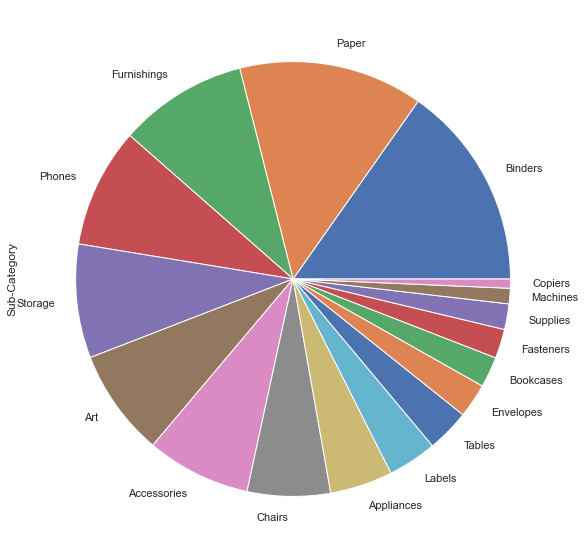

In [173]:
sns.set(rc={'figure.figsize':(10,10)})
data['Sub-Category'].value_counts().plot.pie()

<AxesSubplot:ylabel='Region'>

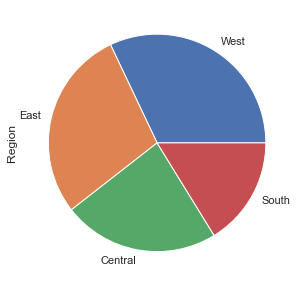

In [174]:
sns.set(rc={'figure.figsize':(5,5)})
data['Region'].value_counts().plot.pie()

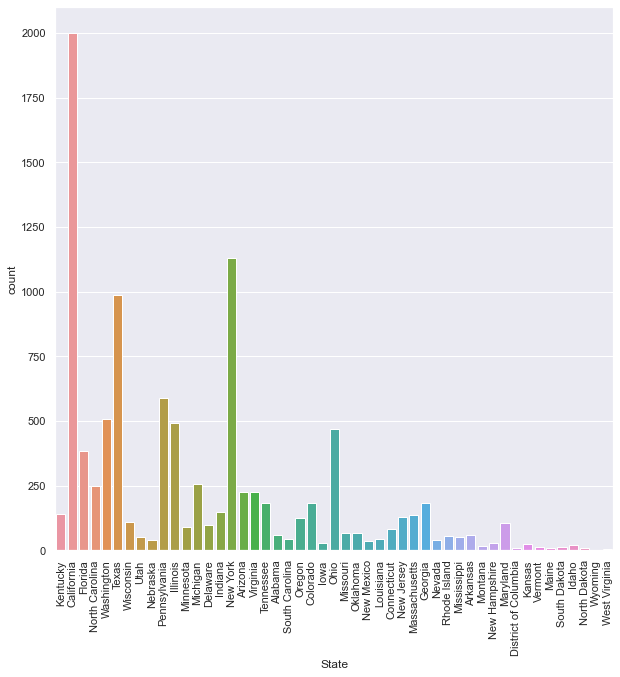

In [175]:
plt.figure(figsize=(10,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)
plt.show()

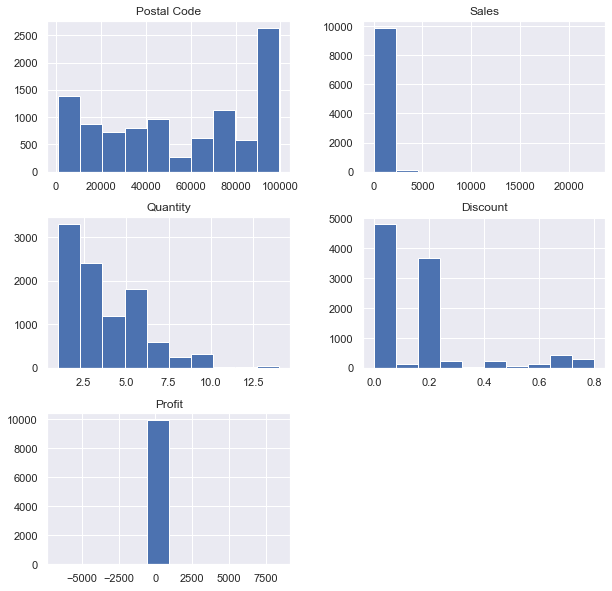

In [176]:
data.hist(figsize=(10,10),bins=10)
plt.show()

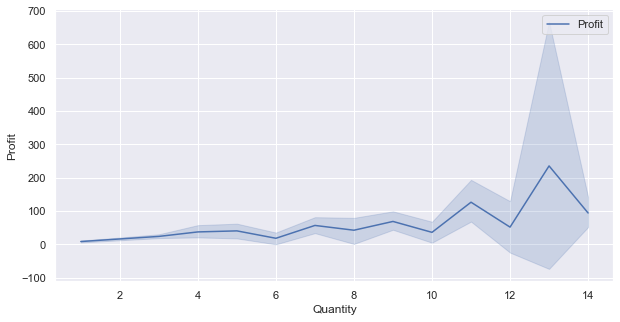

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='Quantity',y='Profit',data=data,label='Profit')
plt.show()

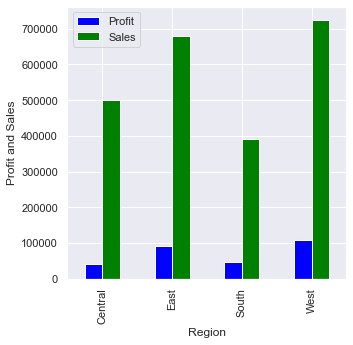

In [122]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','green'],figsize=(5,5))
plt.ylabel('Profit and Sales')
plt.show()

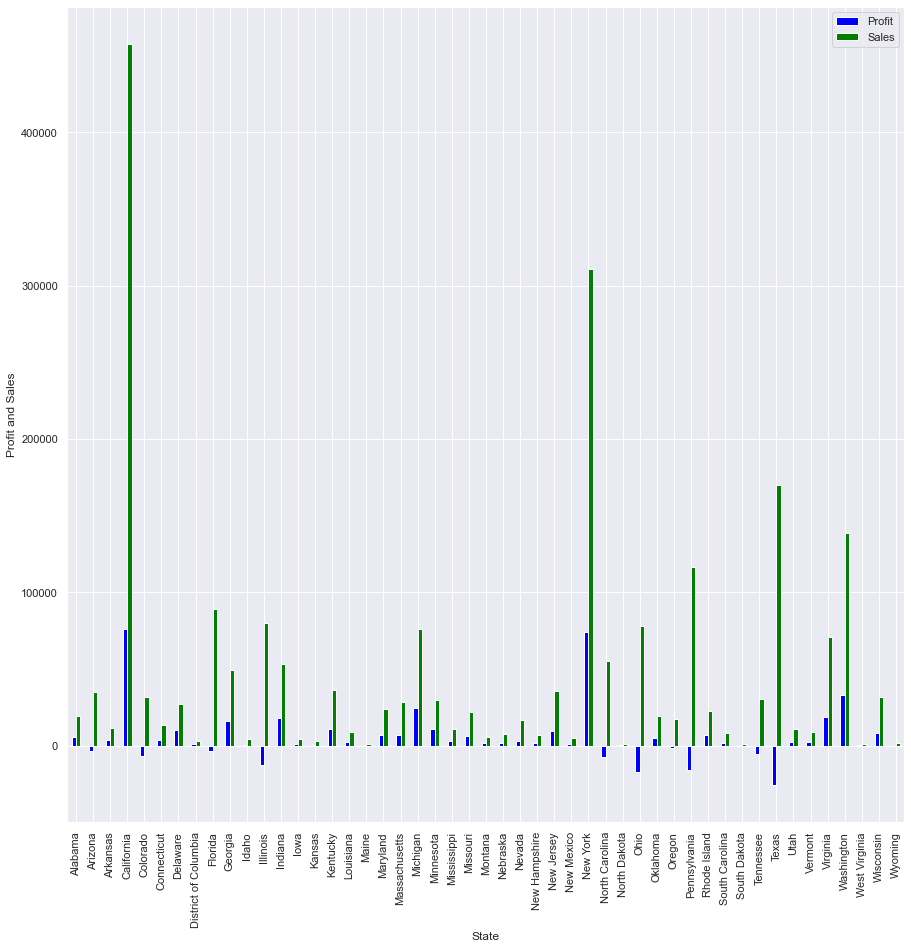

In [123]:
data.groupby('State')[['Profit','Sales']].sum().plot.bar(color=['blue','green'],figsize=(15,15))
plt.ylabel('Profit and Sales')
plt.show()

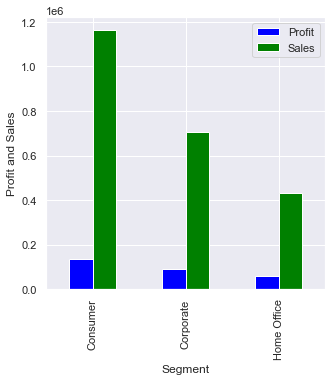

In [149]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['blue','green'],figsize=(5,5))
plt.ylabel('Profit and Sales')
plt.show()

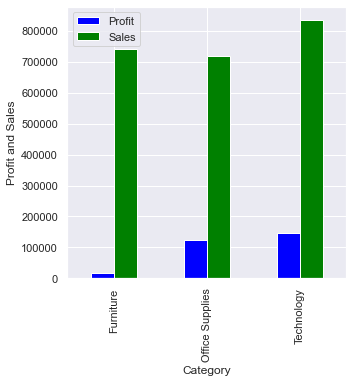

In [150]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['blue','green'],figsize=(5,5))
plt.ylabel('Profit and Sales')
plt.show()

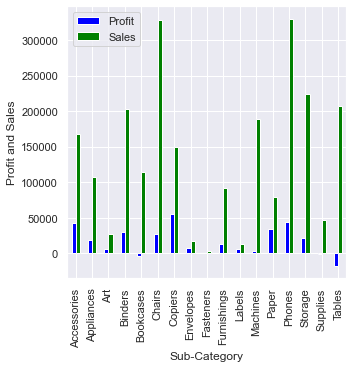

In [177]:
data.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['blue','green'],figsize=(5,5))
plt.ylabel('Profit and Sales')
plt.show()

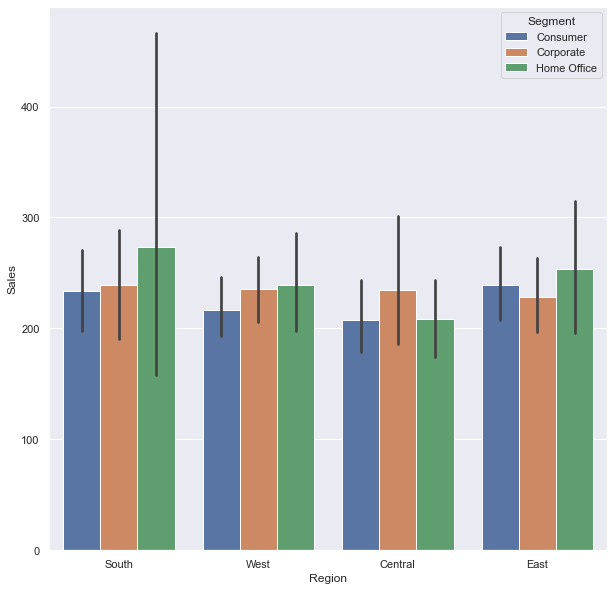

In [152]:
plt.figure(figsize=(10,10))
sns.barplot(x='Region',y='Sales',data= data, hue='Segment')
plt.show()

# Observations

## ship mode
### maximum-standard class
### minimum-same day

## segment
### maximum-consumer
### minimum- home office (weak)

## category
### maximum -office supplies
### minimum -technology(weak)

## sub category
### maximum -binders
### minimum -copiers(weak)

### high profit- california
### less profit-texas(weak)

### high profit market-technology
### less profit market-furniture(weak)

## majority of customers buy quantity of 2 and 3

## profit and sales(segments)
### maximum consumer segment
### minimum home office segment(weak)

## profit and sales(regions)
### maximum west
### minimum-south(weak)

### *we need to work on these weak areas to get better profits*